In [1]:
import pickle
import pandas as pd
import os
from statsmodels.tsa.api import VAR

In [2]:
# with open('var_golden_model.pkl', 'rb') as f:
#     data = pickle.load(f)
    
# print(data)



In [3]:
# my_object = {'name': 'John', 'age': 30}

# with open('my_object.pickle', 'wb') as file:
#     pickle.dump(my_object, file)

In [4]:
# with open('my_object.pickle', 'rb') as file:
#     loaded_object = pickle.load(file)

# print(loaded_object)

{'name': 'John', 'age': 30}


In [5]:
with open('var_golden_model_reduced.pkl', 'rb') as file:
    loaded_object = pickle.load(file)

print(loaded_object)

In [12]:
def load_expert_models(expert_path):
    files = os.listdir(expert_path)
    pickle_files = [file for file in files if file.endswith('.pkl')]
    models = {}

    for file in pickle_files:
        with open(file, 'rb') as f:
            models[file.split('.')[0]] = pickle.load(f)

    return models

expert_path = 'expert_models'
my_experts = load_expert_models(expert_path)
print(my_experts)

{'var_ctrl_stuckat0_perm_reduced': <statsmodels.tsa.vector_ar.var_model.VARResultsWrapper object at 0x0000021D9A9BC310>, 'var_ctrl_stuckat1_perm_reduced': <statsmodels.tsa.vector_ar.var_model.VARResultsWrapper object at 0x0000021D99488F70>, 'var_ctrl_valueFlip_perm_reduced': <statsmodels.tsa.vector_ar.var_model.VARResultsWrapper object at 0x0000021D9A7BD9F0>, 'var_golden_model_reduced': <statsmodels.tsa.vector_ar.var_model.VARResultsWrapper object at 0x0000021D9A7BF850>}


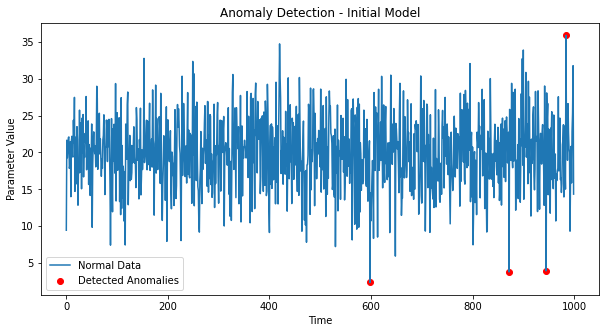

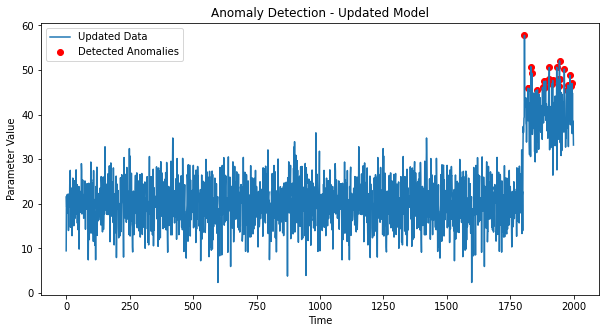

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data representing system parameters (e.g., temperature, pressure)
# Normal operation data
normal_data = np.random.normal(loc=20, scale=5, size=1000)

# Injecting a fault (e.g., sudden increase in temperature)
faulty_data = np.concatenate([normal_data[:800], np.random.normal(loc=40, scale=5, size=200)])

# Function to detect anomalies using Z-score
def detect_anomalies(data, threshold=3):
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = [(x - mean) / std_dev for x in data]
    anomalies = np.where(np.abs(z_scores) > threshold)[0]
    return anomalies

# Initial anomaly detection using normal data
anomalies = detect_anomalies(normal_data)

# Plotting normal data with detected anomalies
plt.figure(figsize=(10, 5))
plt.plot(normal_data, label='Normal Data')
plt.scatter(anomalies, normal_data[anomalies], color='red', label='Detected Anomalies')
plt.title('Anomaly Detection - Initial Model')
plt.xlabel('Time')
plt.ylabel('Parameter Value')
plt.legend()
plt.show()

# Simulating adaptive modeling by updating model with faulty data
updated_data = np.concatenate([normal_data, faulty_data])
updated_anomalies = detect_anomalies(updated_data)

# Plotting updated data with detected anomalies
plt.figure(figsize=(10, 5))
plt.plot(updated_data, label='Updated Data')
plt.scatter(updated_anomalies, updated_data[updated_anomalies], color='red', label='Detected Anomalies')
plt.title('Anomaly Detection - Updated Model')
plt.xlabel('Time')
plt.ylabel('Parameter Value')
plt.legend()
plt.show()


Training MSE: 4.780720799433439
Testing MSE: 5.879226456742918


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

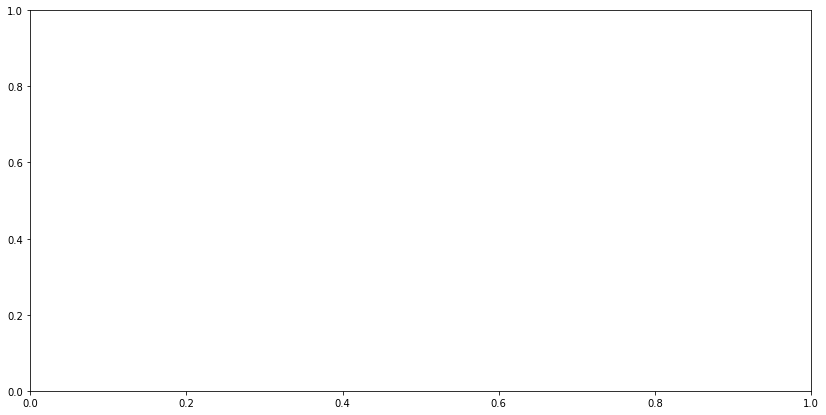

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate synthetic time series data
np.random.seed(0)
time = np.arange(100)
data = 0.5 * time + np.sin(time) + np.random.normal(scale=2, size=time.shape)
df = pd.DataFrame({'time': time, 'value': data})

# Create lag features
def create_lag_features(df, lags):
    for lag in lags:
        df[f'lag_{lag}'] = df['value'].shift(lag)
    return df.dropna()

lags = [1, 2, 3]
df_lagged = create_lag_features(df, lags)

# Define features and target variable
X = df_lagged[[f'lag_{lag}' for lag in lags]]
y = df_lagged['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'Training MSE: {mse_train}')
print(f'Testing MSE: {mse_test}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['value'], label='True Values')
plt.plot(df_lagged['time'][len(lags):len(lags) + len(y_pred_train)], y_pred_train, label='Training Predictions')
plt.plot(df_lagged['time'][len(lags) + len(y_pred_train):], y_pred_test, label='Testing Predictions')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Prediction using Linear Regression')
plt.show()
